In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [31]:
import datetime
import time
from importlib import reload
import read_stream_data_gcp_save
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd
import glob
from scipy.optimize import minimize

In [6]:
from __future__ import unicode_literals

figsize(8,6)

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
    
rcParams['xtick.labelsize'] = 20
rcParams['xtick.major.size'] = 10
rcParams['xtick.major.width'] = 1
rcParams['xtick.major.pad'] = 10
rcParams['xtick.minor.size'] = 5
rcParams['xtick.minor.width'] = 1

rcParams['ytick.labelsize'] = 20
rcParams['ytick.major.size'] = 10
rcParams['ytick.major.width'] = 1
rcParams['ytick.major.pad'] = 10
rcParams['ytick.minor.size'] = 5
rcParams['ytick.minor.width'] = 1

rcParams['legend.fontsize'] = 12
rcParams['legend.borderaxespad'] = 2

rcParams['axes.labelsize'] = 24
rcParams['axes.titlesize'] = 24

rcParams['ytick.direction'] = 'in'
rcParams['xtick.direction'] = 'in'

In [7]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [8]:
pwd

'C:\\Users\\Heather\\Documents\\Git\\so_readout_and_detectors\\SMuRF\\201908_mmbv2p'

In [9]:
ls

 Volume in drive C is OS
 Volume Serial Number is CAD1-D850

 Directory of C:\Users\Heather\Documents\Git\so_readout_and_detectors\SMuRF\201908_mmbv2p

08/22/2019  12:05 PM    <DIR>          .
08/22/2019  12:05 PM    <DIR>          ..
08/22/2019  12:03 PM    <DIR>          .ipynb_checkpoints
08/22/2019  10:05 AM    <DIR>          __pycache__
08/12/2019  12:48 PM    <DIR>          1565290314
08/22/2019  11:49 AM           227,724 20190812_4GHz_white_noise_hist.pdf
08/22/2019  12:01 PM           126,888 20190822_LB_noise_averaged.ipynb
08/22/2019  12:05 PM           127,274 20190822_LB_noise_fit_single_plot.ipynb
01/30/2019  01:04 PM             1,734 peak_finder.py
04/18/2019  11:25 AM             5,155 read_stream_data_gcp_save.py
01/16/2019  06:33 PM             3,176 resonator_model.py
               6 File(s)        491,951 bytes
               5 Dir(s)  202,897,309,696 bytes free


In [10]:
files = glob.glob('1565290314/outputs/*part*')

In [11]:
files

['1565290314/outputs\\1565290746.dat.part_00000',
 '1565290314/outputs\\1565290888.dat.part_00000',
 '1565290314/outputs\\1565291014.dat.part_00000',
 '1565290314/outputs\\1565291156.dat.part_00000',
 '1565290314/outputs\\1565291299.dat.part_00000',
 '1565290314/outputs\\1565291428.dat.part_00000',
 '1565290314/outputs\\1565291557.dat.part_00000',
 '1565290314/outputs\\1565291700.dat.part_00000',
 '1565290314/outputs\\1565291830.dat.part_00000',
 '1565290314/outputs\\1565291961.dat.part_00000',
 '1565290314/outputs\\1565292106.dat.part_00000',
 '1565290314/outputs\\1565292251.dat.part_00000',
 '1565290314/outputs\\1565292396.dat.part_00000',
 '1565290314/outputs\\1565292539.dat.part_00000',
 '1565290314/outputs\\1565292670.dat.part_00000',
 '1565290314/outputs\\1565292801.dat.part_00000',
 '1565290314/outputs\\1565292962.dat.part_00000',
 '1565290314/outputs\\1565293078.dat.part_00000',
 '1565290314/outputs\\1565293218.dat.part_00000',
 '1565290314/outputs\\1565293347.dat.part_00000',


In [12]:
len(files)

345

In [ ]:
1565301676

In [13]:
file = '1565290314/outputs\\1565295103.dat.part_00000'

In [14]:
timestamp, phase, mask = read_stream_data_gcp_save.read_stream_data_gcp_save(datafile=file)

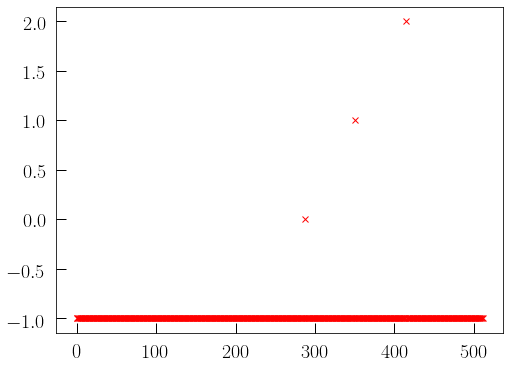

In [17]:
plot(mask[0], 'x', color = 'r')

In [18]:
np.where(mask[0]!=-1)

(array([287, 351, 415], dtype=int64),)

In [19]:
pA_per_phi0 = 9000000 /(2*np.pi)* (228/178)
fs = 200

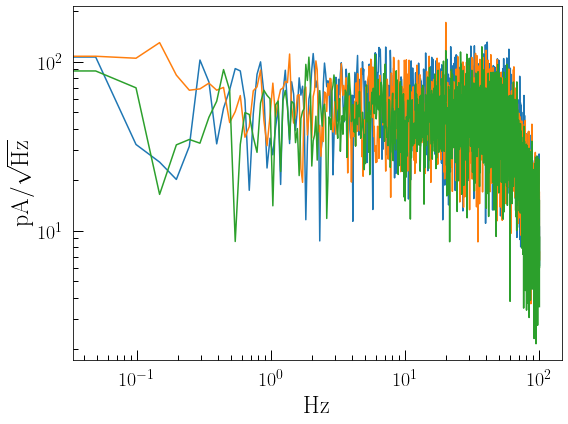

In [20]:
S_w = []

figure(figsize = (8,6))

for i in arange(max(mask[0,:])+1):
    #get timestream and subtract out average
    ts_rad = phase[i,:] - np.mean(phase[i,:])
    ts_pA = ts_rad *pA_per_phi0
    pxx, fr = mlab.psd(ts_pA, NFFT=2**12, Fs=fs)
    pxx = np.sqrt(pxx)

    #get white noise level
    fr_1 = find_nearest(fr,0.5)
    fr_10 = find_nearest(fr,20)
    
    loglog(fr, pxx)
    #loglog(fr[fr_1:fr_10], pxx[fr_1:fr_10], color = 'r')

    wn_average = np.average(pxx[fr_1:fr_10])
    #axhline(wn_average, color = 'g')
    S_w.append(wn_average)
    
    #print(wn_average)

xlabel('$\mathrm{Hz}$')
ylabel('$\mathrm{pA/\\sqrt{Hz}}$');
tight_layout()

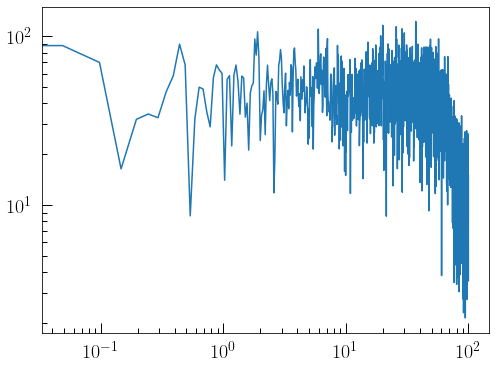

In [24]:
i = 2
ts_rad = phase[i,:] - np.mean(phase[i,:])
ts_pA = ts_rad *pA_per_phi0
pxx, fr = mlab.psd(ts_pA, NFFT=2**12, Fs=fs)
pxx = np.sqrt(pxx)

#get white noise level
fr_1 = find_nearest(fr,0.5)
fr_10 = find_nearest(fr,20)

loglog(fr, pxx)

In [41]:
np.savez('fr', fr)

In [42]:
np.savez('pxx', pxx)

In [43]:
ls

 Volume in drive C is OS
 Volume Serial Number is CAD1-D850

 Directory of C:\Users\Heather\Documents\Git\so_readout_and_detectors\SMuRF\201908_mmbv2p

08/22/2019  12:21 PM    <DIR>          .
08/22/2019  12:21 PM    <DIR>          ..
08/22/2019  12:03 PM    <DIR>          .ipynb_checkpoints
08/22/2019  10:05 AM    <DIR>          __pycache__
08/12/2019  12:48 PM    <DIR>          1565290314
08/22/2019  11:49 AM           227,724 20190812_4GHz_white_noise_hist.pdf
08/22/2019  12:01 PM           126,888 20190822_LB_noise_averaged.ipynb
08/22/2019  12:21 PM           273,603 20190822_LB_noise_fit_single_plot.ipynb
08/22/2019  12:21 PM            16,636 fr.npz
01/30/2019  01:04 PM             1,734 peak_finder.py
08/22/2019  12:21 PM            16,636 pxx.npz
04/18/2019  11:25 AM             5,155 read_stream_data_gcp_save.py
01/16/2019  06:33 PM             3,176 resonator_model.py
               8 File(s)        671,552 bytes
               5 Dir(s)  202,877,755,392 bytes free


In [25]:
def noise_model_with_alpha(f, white_noise, f_knee, alpha, f_c, amp):
    return ((white_noise)*(1 + (f_knee/f)**alpha)* (1/(1 + (f/f_c)**2))+amp)

In [26]:
def resids(x):
    white_noise, f_knee, alpha, f_c, amp = x
    prior = priors(x)
    if np.isfinite(prior):
        return np.sum( (noise_model_with_alpha(fr, white_noise, f_knee, alpha, f_c, amp) - pxx)**2 )
    else:
        return prior

In [27]:
def priors(x):
    white_noise, f_knee, alpha, f_c, amp = x
    if white_noise < 0 or f_knee < 0 or alpha < 0 or f_c < 0 or amp <0:
        return np.inf
    else:
        return 0

In [37]:
p0 = np.array([50, 0.02, 1, 200, 1])

In [38]:
popt3 = minimize(resids, p0, method='Powell')

C:\Users\Heather\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
C:\Users\Heather\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in square
  """
C:\Users\Heather\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in power
  
C:\Users\Heather\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in multiply
  


C:\Users\Heather\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
C:\Users\Heather\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in power
  
C:\Users\Heather\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in multiply
  


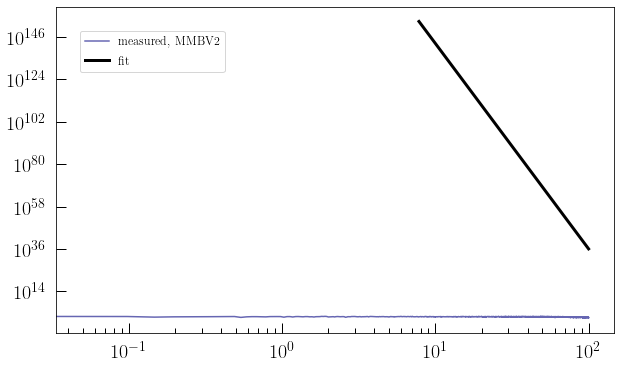

In [39]:
figsize(10,6)
loglog(fr, np.sqrt(pxx), alpha = 0.6, color = 'navy', label = '$\mathrm{measured,\ MMBV2}$')
loglog(fr, np.sqrt(noise_model_with_alpha(fr, *popt3.x)), lw=3, color = 'k', label = '$\mathrm{fit}$')
legend()

C:\Users\Heather\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
C:\Users\Heather\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in power
  
C:\Users\Heather\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in multiply
  


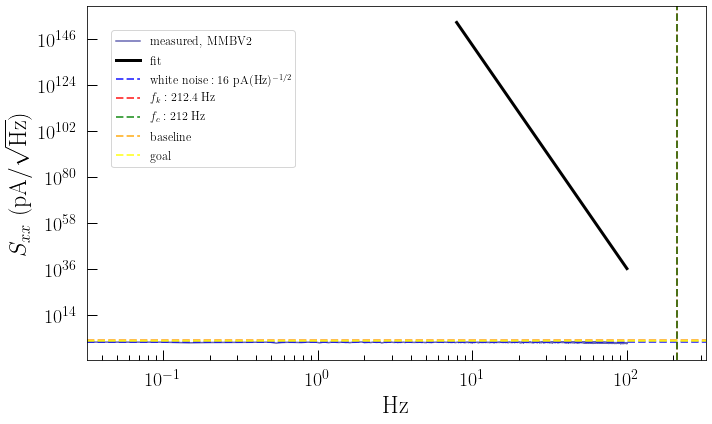

In [34]:
figsize(10,6)
loglog(fr, np.sqrt(pxx), alpha = 0.6, color = 'navy', label = '$\mathrm{measured,\ MMBV2}$')
loglog(fr, np.sqrt(noise_model_with_alpha(fr, *popt3.x)), lw=3, color = 'k', label = '$\mathrm{fit}$')

axhline(np.sqrt(popt3.x[0]), linestyle='--', color = 'blue', alpha=0.7, lw=2,
        label = '$\mathrm{white\ noise: %0.0f~pA (Hz)^{-1/2}}$' % np.sqrt(popt3.x[0]))

axvline(popt3.x[1], linestyle='--', color = 'red', alpha=0.7, lw=2,
        label = '$f_k: %0.1f~\mathrm{Hz}$' % popt3.x[1])

axvline(popt3.x[3], linestyle='--', color = 'green', alpha=0.7, lw=2,
        label = '$f_c: %0.0f~\mathrm{Hz}$' % popt3.x[3])

axhline(65, linestyle='--', color = 'orange', alpha=0.7, lw=2,
        label = '$\mathrm{baseline}$' )

axhline(45, linestyle='--', color = 'yellow', alpha=0.7, lw=2,
        label = '$\mathrm{goal}$' )

xlabel('$\mathrm{Hz}$')
ylabel('$S_{xx}~\mathrm{(pA/\\sqrt{Hz})}$')
legend()
tight_layout()

In [21]:
S_w

[60.69266562256218, 54.60268886374592, 49.46705623271406]

In [31]:
d_noise = {'file':[],
    'file_number': [],
    'mask_index':[], 
    'Sw':[],
    'f0':[], 
    'Qi':[], 
    'Qc':[],
    'Q':[],
    'br': []}
        

d_noise = pd.DataFrame(d_noise)
#d_noise = dnoise[['resonator_index', 'f0', 'Qi', 'Qc', 'Q', 'br']]

d_noise

,file,file_number,mask_index,Sw,f0,Qi,Qc,Q,br


In [50]:
files2 = ['1565290314/outputs\\1565302150.dat.part_00000',
 '1565290314/outputs\\1565302293.dat.part_00000',
 '1565290314/outputs\\1565302434.dat.part_00000',
 '1565290314/outputs\\1565302564.dat.part_00000',
 '1565290314/outputs\\1565302707.dat.part_00000',
 '1565290314/outputs\\1565302932.dat.part_00000',
 '1565290314/outputs\\1565303062.dat.part_00000',
 '1565290314/outputs\\1565303207.dat.part_00000',
 '1565290314/outputs\\1565303352.dat.part_00000',
 '1565290314/outputs\\1565303495.dat.part_00000',
 '1565290314/outputs\\1565303639.dat.part_00000',
 '1565290314/outputs\\1565303783.dat.part_00000',
 '1565290314/outputs\\1565303927.dat.part_00000',
 '1565290314/outputs\\1565304056.dat.part_00000',
 '1565290314/outputs\\1565304186.dat.part_00000',
 '1565290314/outputs\\1565304340.dat.part_00000',
 '1565290314/outputs\\1565304481.dat.part_00000',
 '1565290314/outputs\\1565304612.dat.part_00000',
 '1565290314/outputs\\1565304742.dat.part_00000',
 '1565290314/outputs\\1565304884.dat.part_00000',
 '1565290314/outputs\\1565305012.dat.part_00000',
 '1565290314/outputs\\1565305139.dat.part_00000',
 '1565290314/outputs\\1565305268.dat.part_00000',
 '1565290314/outputs\\1565305410.dat.part_00000',
 '1565290314/outputs\\1565305552.dat.part_00000',
 '1565290314/outputs\\1565305682.dat.part_00000',
 '1565290314/outputs\\1565305810.dat.part_00000',
 '1565290314/outputs\\1565305939.dat.part_00000',
 '1565290314/outputs\\1565306080.dat.part_00000',
 '1565290314/outputs\\1565306209.dat.part_00000',
 '1565290314/outputs\\1565306337.dat.part_00000',
 '1565290314/outputs\\1565306488.dat.part_00000',
 '1565290314/outputs\\1565306618.dat.part_00000',
 '1565290314/outputs\\1565306760.dat.part_00000',
 '1565290314/outputs\\1565306890.dat.part_00000',
 '1565290314/outputs\\1565307032.dat.part_00000',
 '1565290314/outputs\\1565307177.dat.part_00000',
 '1565290314/outputs\\1565307308.dat.part_00000',
 '1565290314/outputs\\1565307452.dat.part_00000',
 '1565290314/outputs\\1565307600.dat.part_00000',
 '1565290314/outputs\\1565307731.dat.part_00000',
 '1565290314/outputs\\1565307872.dat.part_00000',
 '1565290314/outputs\\1565308001.dat.part_00000',
 '1565290314/outputs\\1565308142.dat.part_00000',
 '1565290314/outputs\\1565308276.dat.part_00000',
 '1565290314/outputs\\1565308406.dat.part_00000',
 '1565290314/outputs\\1565308548.dat.part_00000',
 '1565290314/outputs\\1565308749.dat.part_00000',
 '1565290314/outputs\\1565308866.dat.part_00000',
 '1565290314/outputs\\1565308994.dat.part_00000',
 '1565290314/outputs\\1565309136.dat.part_00000',
 '1565290314/outputs\\1565309279.dat.part_00000',
 '1565290314/outputs\\1565309421.dat.part_00000',
 '1565290314/outputs\\1565309566.dat.part_00000',
 '1565290314/outputs\\1565309711.dat.part_00000',
 '1565290314/outputs\\1565309842.dat.part_00000',
 '1565290314/outputs\\1565309973.dat.part_00000',
 '1565290314/outputs\\1565310125.dat.part_00000',
 '1565290314/outputs\\1565310266.dat.part_00000',
 '1565290314/outputs\\1565310408.dat.part_00000',
 '1565290314/outputs\\1565310537.dat.part_00000',
 '1565290314/outputs\\1565310678.dat.part_00000',
 '1565290314/outputs\\1565310823.dat.part_00000',
 '1565290314/outputs\\1565310967.dat.part_00000',
 '1565290314/outputs\\1565311097.dat.part_00000',
 '1565290314/outputs\\1565311240.dat.part_00000',
 '1565290314/outputs\\1565311375.dat.part_00000',
 '1565290314/outputs\\1565311507.dat.part_00000',
 '1565290314/outputs\\1565311651.dat.part_00000',
 '1565290314/outputs\\1565311784.dat.part_00000',
 '1565290314/outputs\\1565311914.dat.part_00000',
 '1565290314/outputs\\1565312056.dat.part_00000',
 '1565290314/outputs\\1565312186.dat.part_00000',
 '1565290314/outputs\\1565312328.dat.part_00000',
 '1565290314/outputs\\1565312459.dat.part_00000',
 '1565290314/outputs\\1565312603.dat.part_00000',
 '1565290314/outputs\\1565312805.dat.part_00000',
 '1565290314/outputs\\1565312948.dat.part_00000',
 '1565290314/outputs\\1565313078.dat.part_00000',
 '1565290314/outputs\\1565313193.dat.part_00000',
 '1565290314/outputs\\1565313333.dat.part_00000',
 '1565290314/outputs\\1565313462.dat.part_00000',
 '1565290314/outputs\\1565313578.dat.part_00000',
 '1565290314/outputs\\1565313717.dat.part_00000',
 '1565290314/outputs\\1565313847.dat.part_00000',
 '1565290314/outputs\\1565313990.dat.part_00000',
 '1565290314/outputs\\1565314122.dat.part_00000',
 '1565290314/outputs\\1565314238.dat.part_00000',
 '1565290314/outputs\\1565314379.dat.part_00000',
 '1565290314/outputs\\1565314512.dat.part_00000',
 '1565290314/outputs\\1565314655.dat.part_00000']

In [82]:
k = 0
for file in files2:
    print (file)
    timestamp, phase, mask = read_stream_data_gcp_save.read_stream_data_gcp_save(datafile=file)
    
    file_no = k
    channels = np.where(mask[1]!=-1)
    #print(file_no)
    for i in arange(max(mask[1,:])+1):
        #get timestream and subtract out average
        ts_rad = phase[i,:] - np.mean(phase[i,:])
        ts_pA = ts_rad *pA_per_phi0
        pxx, fr = mlab.psd(ts_pA, NFFT=2**12, Fs=fs)
        pxx = np.sqrt(pxx)

        #get white noise level
        fr_1 = find_nearest(fr,0.5)
        fr_10 = find_nearest(fr,20)

        wn_average = np.average(pxx[fr_1:fr_10])
        #print(channels[0][i])
        d_noise = d_noise.append({'file': file, 'file_number': file_no, 'mask_index':channels[0][i], 'Sw':wn_average}, ignore_index=True)
    k=k+1

1565290314/outputs\1565302150.dat.part_00000
1565290314/outputs\1565302293.dat.part_00000
1565290314/outputs\1565302434.dat.part_00000
1565290314/outputs\1565302564.dat.part_00000
1565290314/outputs\1565302707.dat.part_00000
1565290314/outputs\1565302932.dat.part_00000
1565290314/outputs\1565303062.dat.part_00000
1565290314/outputs\1565303207.dat.part_00000
1565290314/outputs\1565303352.dat.part_00000
1565290314/outputs\1565303495.dat.part_00000
1565290314/outputs\1565303639.dat.part_00000
1565290314/outputs\1565303783.dat.part_00000
1565290314/outputs\1565303927.dat.part_00000
1565290314/outputs\1565304056.dat.part_00000
1565290314/outputs\1565304186.dat.part_00000
1565290314/outputs\1565304340.dat.part_00000
1565290314/outputs\1565304481.dat.part_00000
1565290314/outputs\1565304612.dat.part_00000
1565290314/outputs\1565304742.dat.part_00000
1565290314/outputs\1565304884.dat.part_00000
1565290314/outputs\1565305012.dat.part_00000
1565290314/outputs\1565305139.dat.part_00000
1565290314

In [84]:
#1565301676 is the last band 0 file. 184 channels. 

In [85]:
d_noise

,file,file_number,mask_index,Sw,f0,Qi,Qc,Q,br
0,1565290314/outputs\1565290746.dat.part_00000,0.0,309.0,5.670331e+05,NaN,NaN,NaN,NaN,NaN
1,1565290314/outputs\1565290888.dat.part_00000,1.0,269.0,5.299715e+01,NaN,NaN,NaN,NaN,NaN
2,1565290314/outputs\1565290888.dat.part_00000,1.0,333.0,5.081532e+01,NaN,NaN,NaN,NaN,NaN
3,1565290314/outputs\1565291014.dat.part_00000,2.0,301.0,1.818929e+02,NaN,NaN,NaN,NaN,NaN
4,1565290314/outputs\1565291156.dat.part_00000,3.0,29.0,1.355261e+02,NaN,NaN,NaN,NaN,NaN
5,1565290314/outputs\1565291156.dat.part_00000,3.0,93.0,1.845870e+02,NaN,NaN,NaN,NaN,NaN
6,1565290314/outputs\1565291156.dat.part_00000,3.0,157.0,1.324799e+02,NaN,NaN,NaN,NaN,NaN
7,1565290314/outputs\1565291299.dat.part_00000,4.0,285.0,1.849708e+02,NaN,NaN,NaN,NaN,NaN
8,1565290314/outputs\1565291428.dat.part_00000,5.0,61.0,1.029038e+02,NaN,NaN,NaN,NaN,NaN
9,1565290314/outputs\1565291428.dat.part_00000,5.0,125.0,1.387376e+02,NaN,NaN,NaN,NaN,NaN


In [98]:
df_cuts = d_noise[d_noise['Sw']<600]

In [99]:
len(df_cuts)

350

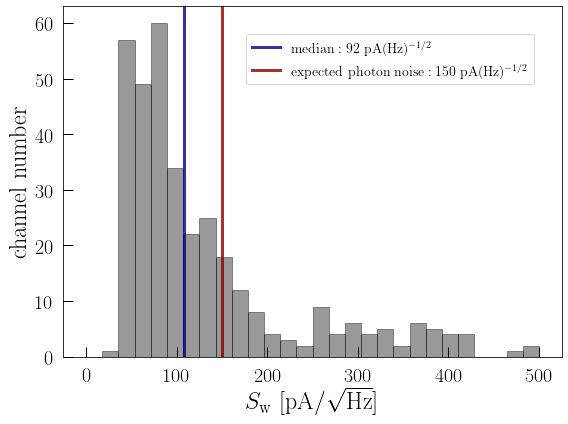

In [135]:
figure(figsize = (8,6))
hist(d_noise['Sw'], bins = 28, range = (0,500), color = 'k', edgecolor='black', linewidth=1, alpha=0.4);
axvline(median(d_noise['Sw']), alpha =0.8, lw=3, label = '$\mathrm{median: %3.0f~pA (Hz)^{-1/2}}$' % median(df_cuts['Sw']), color = 'darkblue')
axvline(150, color = 'darkred', alpha =0.8, lw=3, label = '$\mathrm{expected\ photon\ noise: 150~pA (Hz)^{-1/2}}$')
xlabel('$S_\mathrm{w}~\mathrm{[pA/ \sqrt{Hz}]}$')
ylabel('$\mathrm{channel\ number}$')
legend(fontsize = 14)
tight_layout()
savefig('20190812_4GHz_white_noise_hist.pdf')